# Daten Visualisierung mit Python, Pandas und Matplotlib

In diesem Tutorial wird gezeigt wie mehrere Tabellen in Pandas miteinander verknüpft werden können und diese dann graphisch mit dem Python Paket [Matplotlib](https://matplotlib.org/stable/index.html) visualisiert werden können. Für weitergehende Informationen werden das [Matplotlib pyplot Tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) sowie die Pandas Tutorials [How to create plots in pandas?
](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/04_plotting.html), [How to combine data from multiple tables?](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html) und [How to handle time series data with ease?](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/09_timeseries.html) empfohlen.

Zunächst müssen alle benötigten Pakete installiert werden mit `pip`

In [3]:
!pip install pandas matplotlib requests

import requests
import pandas as pd
import matplotlib.pyplot as plt
import requests

Im folgenden werden die Torjäger der 1. Bundesliga aus den letzten 10 Jahren über OpenLigaDB geladen und in einem Pandas DataFrame gespeichert. 

In [186]:
import requests

tabellen = pd.DataFrame()

# rufe die daten der Jahre 2010 bis 2020 ab
for jahr in range(2010,2021):
    # Rufe Tabelle des Jahres jahr ab
    antwort = requests.get(f"https://www.openligadb.de/api/getbltable/bl1/{jahr}")
    # Erstelle DataFrame Tabelle und füge jahr als neue Spalte hinzu
    tabelle = pd.DataFrame(antwort.json())
    tabelle['jahr'] = jahr
    # Füge eine Spalte Platzierung hinzu indem der Index, welcher bei 0 anfängt, um eins erhöht in der Spalte Platzierung gespeichert wrid
    tabelle['platzierung'] = tabelle.reset_index().index + 1
    # Füge Zeilen (axis=0) von DataFrame tabelle und DataFrame tabellen zusammen
    tabellen = pd.concat([tabellen, tabelle], axis=0)

Nun können die Tabellen nach der maximalen Anzahl Tore pro Jahr groupiert und dann als Plot visualisiert werden.

<AxesSubplot:xlabel='jahr'>

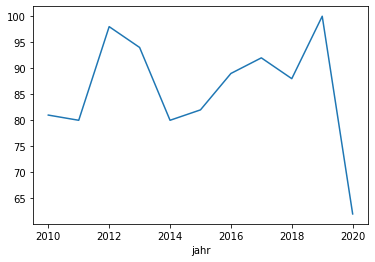

In [37]:
tabellen.groupby("jahr")["Goals"].max().plot()

Eine weitere Möglichkeit ist, die Tore aller Mannschaften pro Jahr als Scatter Plot auszugeben und die Tore aufsteigend farblich mit einem Farb-Schema einzufärben.

<AxesSubplot:xlabel='jahr', ylabel='Goals'>

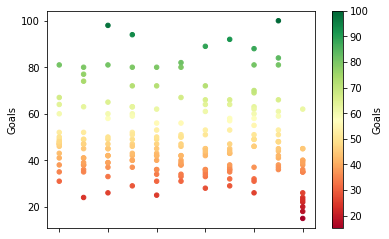

In [45]:
tabellen.plot.scatter(x="jahr", y="Goals", c="Goals", cmap='RdYlGn')

In [ ]:
Im folgenden werden für alle Mannschaften die Platzierung inklusive Logo angezeigt und visualisiert.

https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Logo_1_FC_Kaiserslautern.svg/240px-Logo_1_FC_Kaiserslautern.svg.png
https://upload.wikimedia.org/wikipedia/en/thumb/5/53/FC_Cologne_logo.svg/901px-FC_Cologne_logo.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/1._FC_N%C3%BCrnberg_logo.svg/240px-1._FC_N%C3%BCrnberg_logo.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/1._FC_Union_Berlin_Logo.svg/240px-1._FC_Union_Berlin_Logo.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Logo_Mainz_05.svg/1099px-Logo_Mainz_05.svg.png
https://upload.wikimedia.org/wikipedia/de/thumb/e/e5/Logo_Arminia_Bielefeld.svg/1024px-Logo_Arminia_Bielefeld.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Borussia_Dortmund_logo.svg/240px-Borussia_Dortmund_logo.svg.png
https://upload.wikimedia.org/wikipedia/de/thumb/f/f7/Bayer_Leverkusen_Logo.svg/1280px-Bayer_Leverkusen_Logo.svg.png
https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Bo

<function matplotlib.pyplot.show(close=None, block=None)>

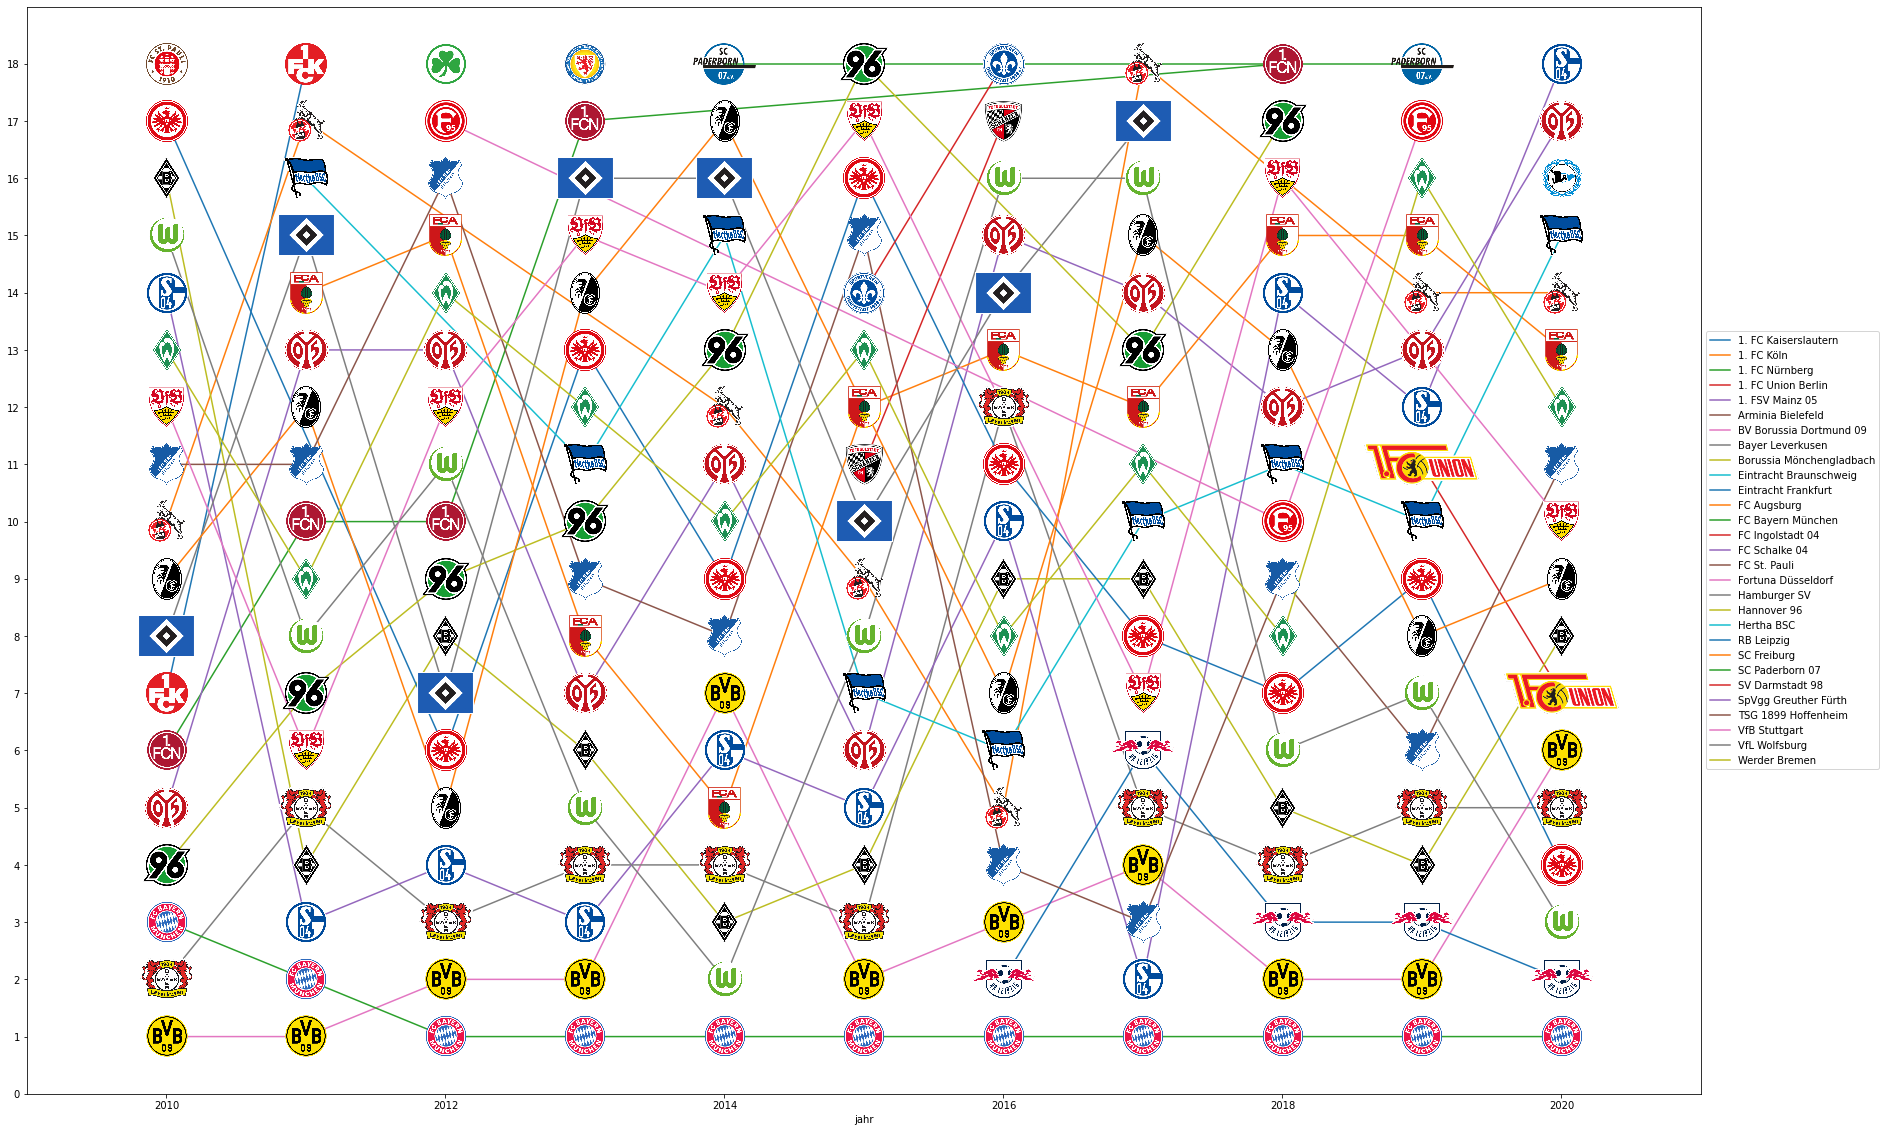

In [196]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import urllib

# jedes Team wird als einzelner Plot erstellt und dann am Ende mit plt.show angezeigt
fig, ax = plt.subplots(figsize=(30, 20))

# die Tabellen werden nach Teams groupiert und dann wird für jedes team ein eigener DataFrame group erstellt, welcher alle Informationen aller Jahre jedoch nur für dieses Team enthält
for team, group in tabellen.groupby(['TeamName']):
    # das team icon wird extrahiert, jedoch muss dieses im png Format vorliegen - daher werden einige URLs ersetzt
    image_url = group['TeamIconUrl'].iloc[0]
    image_url = image_url.replace("https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/1._FC_Union_Berlin_1966_-_1990.gif/320px-1._FC_Union_Berlin_1966_-_1990.gif","https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/1._FC_Union_Berlin_Logo.svg/240px-1._FC_Union_Berlin_Logo.svg.png")
    image_url = image_url.replace("https://www.openligadb.de/images/teamicons/SV_Darmstadt_98.gif","https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/SV_Darmstadt_98_Logo.svg/240px-SV_Darmstadt_98_Logo.svg.png")
    image_url = image_url.replace("https://www.openligadb.de/images/teamicons/Eintracht_Braunschweig.gif","https://upload.wikimedia.org/wikipedia/de/thumb/4/45/Logo_Eintracht_Braunschweig.svg/240px-Logo_Eintracht_Braunschweig.svg.png")
    
    if image_url.endswith('.svg'):
        image_name = image_url.split("/")[-1]
        image_name_encoded = urllib.parse.quote_plus(image_name)
        image_url = image_url.replace(image_name,image_name_encoded)
        image_url = image_url.replace('https://upload.wikimedia.org/wikipedia/commons','https://upload.wikimedia.org/wikipedia/commons/thumb')        
        image_url = image_url.replace('https://upload.wikimedia.org/wikipedia/de','https://upload.wikimedia.org/wikipedia/de/thumb')     
        image_url = f"{image_url}/240px-{image_name_encoded}.png"

    # einlesen des Bilds von der angegebenen URL
    image = plt.imread(image_url)
    
    # extrahieren der Dimensionen des Bildes
    height, width, depth = image.shape
    
    # erstellen des plots mit Jahr auf der X-Achse und Platzierung auf der Y-Achse
    ax = group.plot(ax=ax,x='jahr',y='platzierung',label=team)
    
    # hinzufügen des team icon
    for xi, yi in zip(group['jahr'],group['platzierung']):
        im = OffsetImage(image, zoom=3000/height/ax.figure.dpi)
        im.image.axes = ax
        ab = AnnotationBbox(im, (xi,yi), frameon=False, pad=0.0,)
        ax.add_artist(ab)

# explizite Angabe der Start- und Endpunkte der Achsen aus optischen Gründen
plt.axis([2009, 2021, 0, 19])
# Festlegen der einzelnen Schritte in der Achsenbeschriftung der Y-Achse
plt.yticks(range(0,19))
# Festlegen der Position der Y-Achse
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# Ausgeben des Plots
plt.show